<a href="https://colab.research.google.com/github/LinusTC/MLP-CW3/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cotton Leaf Disease Classification

In [1]:
'''! pip install kaggle
from google.colab import drive
drive.mount('/content/drive')
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/Kaggle\ API/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json'''


"! pip install kaggle\nfrom google.colab import drive\ndrive.mount('/content/drive')\n! mkdir ~/.kaggle\n!cp /content/drive/MyDrive/Kaggle\\ API/kaggle.json ~/.kaggle/kaggle.json\n! chmod 600 ~/.kaggle/kaggle.json"

### 1.0 Imports

In [2]:
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

### 1.1 Kaggle Imports

In [3]:
'''import kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("seroshkarim/cotton-leaf-disease-dataset")

print("Path to dataset files:", path)'''

'import kaggle\nimport kagglehub\n\n# Download latest version\npath = kagglehub.dataset_download("seroshkarim/cotton-leaf-disease-dataset")\n\nprint("Path to dataset files:", path)'

In [4]:
'''import os
print(os.listdir("Cotton Plant Images"))'''
path = "/kaggle/input/cotton-leaf-disease-dataset/cotton"

### 2. Load Data

In [5]:
transform = transforms.Compose([
    transforms.Resize(384),
    transforms.CenterCrop(350),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(path, transform=transform)

train_size = len(dataset) // 2
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # No shuffle for testing

labels_map = {
    0: "bacterial_blight",
    1: "curl_virus",
    2: "fussarium_wilt",
    3: "healthy",
}

image, label = train_dataset[0]
image.size()

torch.Size([3, 350, 350])

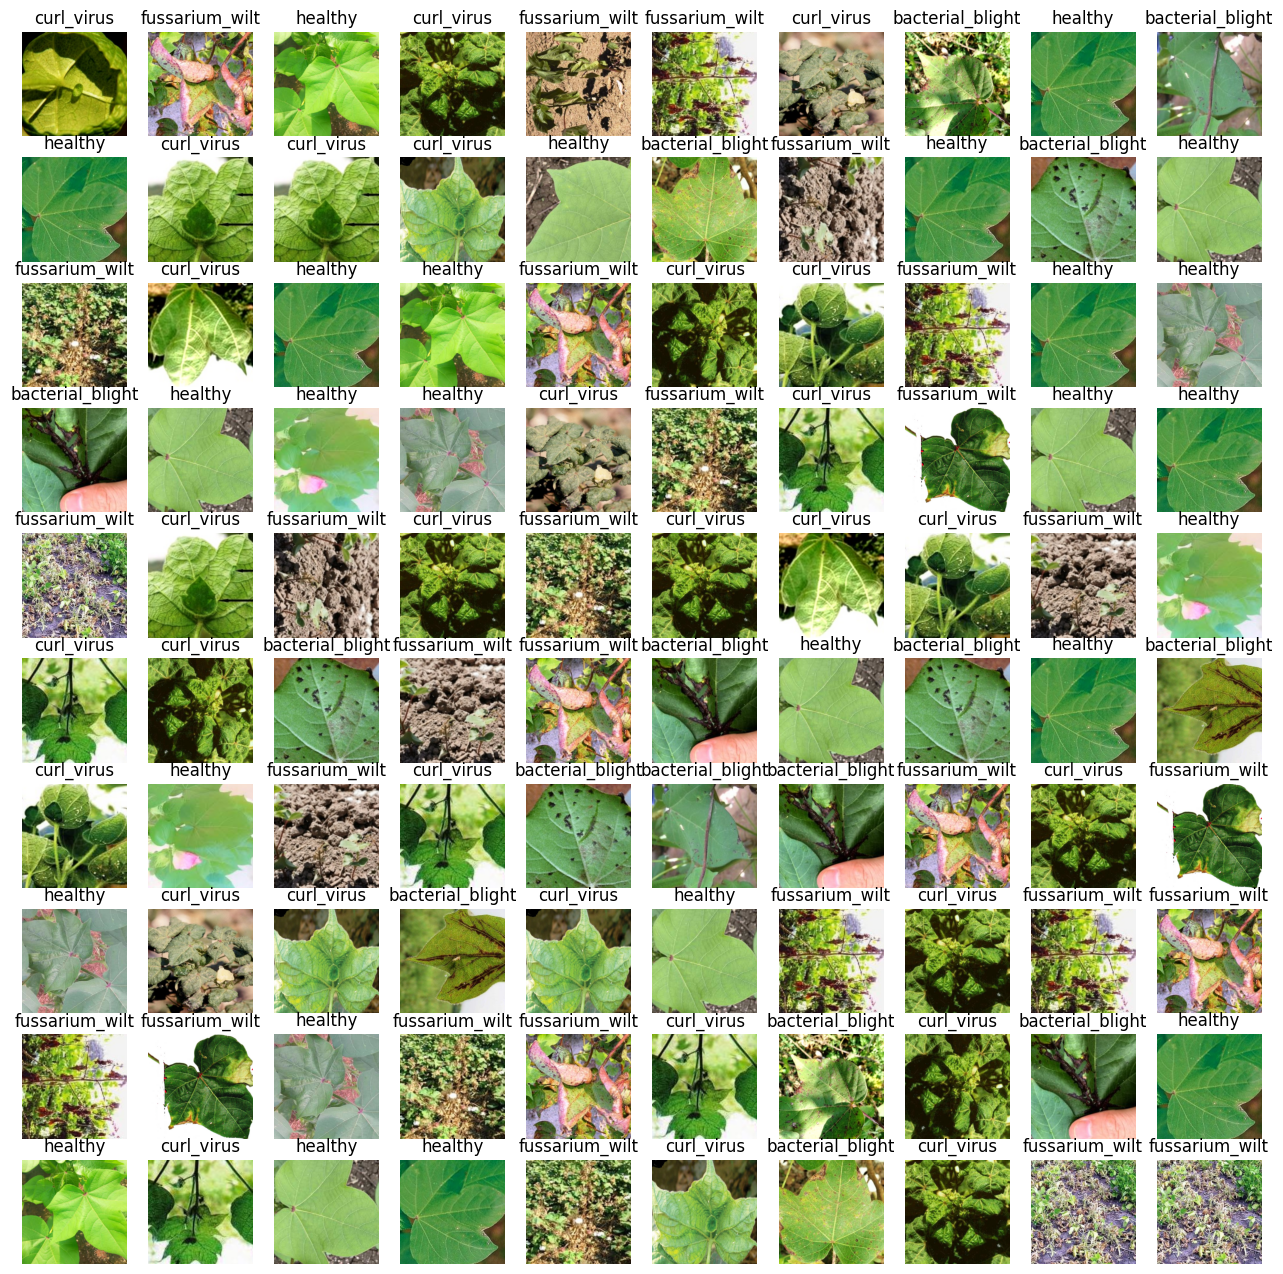

In [6]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Display Sample Images
figure = plt.figure(figsize=(16, 16))
cols, rows = 10, 10

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(images), size=(1,)).item()
    img, label = images[sample_idx], labels[sample_idx].item()

    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")

    img = img.permute(1, 2, 0)  # Convert (C, H, W) to (H, W, C) for display
    plt.imshow(img)

plt.show()


### 3. Object Detection Leaf/Plant

In [7]:
# Nats Code



## 4. Image Classification

In [8]:
classnames = ['bacterial_blight', 'curl_virus', 'fussarium_wilt', 'healthy']

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork (nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 32, 7) #(32, 344, 344)
        self.pool = nn.MaxPool2d (2, 2) #(32, 172, 172)
        self.conv2 = nn.Conv2d(32, 64, 7) #(64, 166, 166) #(64, 83, 83)
        self.conv3 = nn.Conv2d (64, 128, 7) # Output: (256, 76, 76) #(128, 38, 38)
        self.conv4 = nn.Conv2d(128, 256, 7) #(256, 32, 32) #(256, 16, 16)

        self.fc1 = nn.Linear(256 * 16 * 16, 8192)
        self.fc2 = nn.Linear(8192, 1024)
        self.fc3 = nn.Linear(1024, 128)
        self.fc4 = nn.Linear(128, 4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return x

In [10]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetworkSmallKernal (nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 32, 3) #(32, 347, 347)
        self.pool = nn.MaxPool2d (2, 2) #(32, 174, 174)
        self.conv2 = nn.Conv2d(32, 64, 3) #(64, 171, 171) #(64, 86, 86)
        self.conv3 = nn.Conv2d (64, 128, 3) # (256, 83, 83) #(128, 42, 42)
        self.conv4 = nn.Conv2d(128, 256, 3) # (256, 39, 39) #(256, 20, 20)
        self.conv5 = nn.Conv2d(256, 512, 3) # (512, 17, 17) #(512, 9, 9)
        self.conv6 = nn.Conv2d(512, 1048, 3) # Output: (1048, 6, 6) #(1048, 3, 3)

        self.fc1 = nn.Linear(1048 * 3 * 3, 2048)
        self.fc2 = nn.Linear(2048, 256)
        self.fc3 = nn.Linear(256, 64)
        self.fc4 = nn.Linear(64, 4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = self.pool(F.relu(self.conv6(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return x

In [17]:

class GPTNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )
        self.pool = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )

        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))  # Reduces to (batch_size, channels, 1, 1)
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 4)

    def forward(self, x):
        x = self.pool(self.conv1(x))
        x = self.pool(self.conv2(x))
        x = self.pool(self.conv3(x))
        x = self.pool(self.conv4(x))

        x = self.global_avg_pool(x)
        x = torch.flatten(x, 1)
        
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

In [18]:
= GPTNeuralNetwork() #CHANGE HERE

loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(training_net.parameters(), lr=0.001)

In [19]:
import torch
from tqdm import tqdm

num_epochs = 50

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
training_net.to(device)

for epoch in range(num_epochs):
    loop = tqdm(enumerate(train_loader), total=len(train_loader), leave=False)

    running_loss = 0.0
    for i, data in loop:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = training_net(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        loop.set_description(f"Epoch [{epoch+1}/{num_epochs}]")
        loop.set_postfix(loss=loss.item())

    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {running_loss/len(train_loader):.6f}")

loop.close()


Epoch [1/50] Loss: 1.373518


Epoch [2/50] Loss: 1.292802


Epoch [3/50] Loss: 1.240209


Epoch [4/50] Loss: 1.197964


Epoch [5/50] Loss: 1.162442


Epoch [6/50] Loss: 1.135632


Epoch [7/50] Loss: 1.106826


Epoch [8/50] Loss: 1.080038


Epoch [9/50] Loss: 1.063378


Epoch [10/50] Loss: 1.047870


Epoch [11/50] Loss: 1.015028


Epoch [12/50] Loss: 1.007301


Epoch [13/50] Loss: 0.987721


Epoch [14/50] Loss: 0.968173


Epoch [15/50] Loss: 0.951431


Epoch [16/50] Loss: 0.942573


Epoch [17/50] Loss: 0.927117


Epoch [18/50] Loss: 0.906261


Epoch [19/50] Loss: 0.899212


Epoch [20/50] Loss: 0.890174


Epoch [21/50] Loss: 0.873373


Epoch [22/50] Loss: 0.861214


Epoch [23/50] Loss: 0.850364


Epoch [24/50] Loss: 0.842066


Epoch [25/50] Loss: 0.831596


Epoch [26/50] Loss: 0.824865


Epoch [27/50] Loss: 0.822841


Epoch [28/50] Loss: 0.812025


Epoch [29/50] Loss: 0.797685


Epoch [30/50] Loss: 0.798152


Epoch [31/50] Loss: 0.782990


Epoch [32/50] Loss: 0.785639


Epoch [33/50] Loss: 0.779764


Epoch [34/50] Loss: 0.773075


Epoch [35/50] Loss: 0.760551


Epoch [36/50] Loss: 0.749415


Epoch [37/50] Loss: 0.738045


Epoch [38/50] Loss: 0.724688


Epoch [39/50] Loss: 0.742764


Epoch [40/50] Loss: 0.725964


Epoch [41/50] Loss: 0.717974


Epoch [42/50] Loss: 0.707248


Epoch [43/50] Loss: 0.700249


Epoch [44/50] Loss: 0.710869


Epoch [45/50] Loss: 0.691898


Epoch [46/50] Loss: 0.696282


Epoch [47/50] Loss: 0.690260


Epoch [48/50] Loss: 0.682600


Epoch [49/50] Loss: 0.681874


Epoch [50/50] Loss: 0.669456


In [30]:
torch.save(training_net.state_dict(), 'trained_net_.pth')

In [ ]:
# hello this is nat


In [29]:
test_net = GPTNeuralNetwork() #CHANGE HERE

test_net.load_state_dict(torch.load('trained_net_gpt.pth'))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_net.to(device)

test_net.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Testing"):
        images, labels = images.to(device), labels.to(device)

        outputs = test_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)

        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the test images: {accuracy:.2f}%')


<ipython-input-29-09d962825ad8>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_net.load_state_dict(torch.load('trained_net_gpt.pth'))
Testing: 100%|██████████| 27/27 

Accuracy of the network on the test images: 79.88%
